In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
from pathlib import Path

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
)
from sklearn.inspection import permutation_importance


Первые строки:


,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0



Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null 

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000



Пропущенные значения:
id         0
f01        0
f02        0
f03        0
f04        0
f05        0
f06        0
f07        0
f08        0
f09        0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
f27        0
f28        0
f29        0
f30        0
f31        0
f32        0
f33        0
f34        0
f35        0
x_int_1    0
x_int_2    0
target     0
dtype: int64

Распределение target:
target
0    0.737389
1    0.262611
Name: proportion, dtype: float64


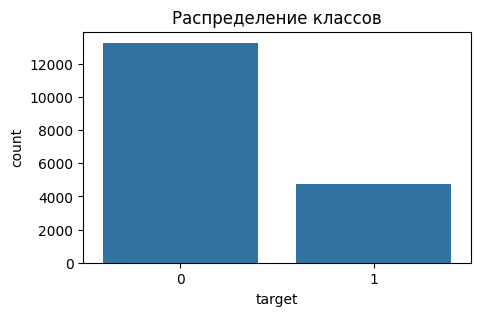

In [3]:
data_path = "S06-hw-dataset-02.csv"
df = pd.read_csv(data_path)

print("Первые строки:")
display(df.head())

print("\nИнформация о датафрейме:")
df.info()

print("\nОписательная статистика:")
display(df.describe())

print(f"\nПропущенные значения:\n{df.isnull().sum()}")

target_counts = df['target'].value_counts(normalize=True)
print(f"\nРаспределение target:\n{target_counts}")

plt.figure(figsize=(5, 3))
sns.countplot(x='target', data=df)
plt.title('Распределение классов')
plt.savefig('artifacts/figures/target_distribution.png', bbox_inches='tight')
plt.show()

X = df.drop(columns=['id', 'target'])
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

Train size: 14400, Test size: 3600


In [6]:
dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
])
lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)
y_proba_lr = lr_pipe.predict_proba(X_test)[:, 1]

def compute_metrics(y_true, y_pred, y_proba=None):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
    }
    if y_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_proba)
    return metrics

metrics_dummy = compute_metrics(y_test, y_pred_dummy, y_proba_dummy)
metrics_lr = compute_metrics(y_test, y_pred_lr, y_proba_lr)

print("DummyClassifier:", metrics_dummy)
print("LogisticRegression:", metrics_lr)

DummyClassifier: {'accuracy': 0.6041666666666666, 'f1': 0.24483306836248012, 'roc_auc': 0.48832391713747647}
LogisticRegression: {'accuracy': 0.8052777777777778, 'f1': 0.5379037574159525, 'roc_auc': 0.7890066660688131}


In [8]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}
models = {}

dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 5, 10],
    'ccp_alpha': [0.0, 0.001, 0.01]
}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=cv, scoring='roc_auc', n_jobs=-1)
dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]
metrics_dt = compute_metrics(y_test, y_pred_dt, y_proba_dt)

results['DecisionTree'] = metrics_dt
models['DecisionTree'] = best_dt

print("Best DT params:", dt_grid.best_params_)
print("DT metrics:", metrics_dt)

rf_params = {
    'n_estimators': [100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_grid = GridSearchCV(rf, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
metrics_rf = compute_metrics(y_test, y_pred_rf, y_proba_rf)

results['RandomForest'] = metrics_rf
models['RandomForest'] = best_rf

print("Best RF:", rf_grid.best_params_)
print("RF metrics:", metrics_rf)

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=cv, scoring='roc_auc', n_jobs=-1)
gb_grid.fit(X_train, y_train)

best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]
metrics_gb = compute_metrics(y_test, y_pred_gb, y_proba_gb)

results['GradientBoosting'] = metrics_gb
models['GradientBoosting'] = best_gb

print("Best GB params:", gb_grid.best_params_)
print("GB metrics:", metrics_gb)

Best DT params: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 10}
DT metrics: {'accuracy': 0.8305555555555556, 'f1': 0.6498277841561424, 'roc_auc': 0.8284510606921153}
Best RF: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}
RF metrics: {'accuracy': 0.8908333333333334, 'f1': 0.7526746381371932, 'roc_auc': 0.9258041630546339}
Best GB params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
GB metrics: {'accuracy': 0.9094444444444445, 'f1': 0.8077830188679245, 'roc_auc': 0.9277577496786535}


In [ ]:
all_metrics = {
    'DummyClassifier': metrics_dummy,
    'LogisticRegression': metrics_lr,
    **results
}

best_model_name = max(results.keys(), key=lambda k: results[k]['roc_auc'])
best_model = models[best_model_name]
best_metrics = results[best_model_name]

print(f"\nЛучшая модель: {best_model_name}")
print(f"Метрики на тесте: {best_metrics}")


Лучшая модель: GradientBoosting
Метрики на test: {'accuracy': 0.9094444444444445, 'f1': 0.8077830188679245, 'roc_auc': 0.9277577496786535}


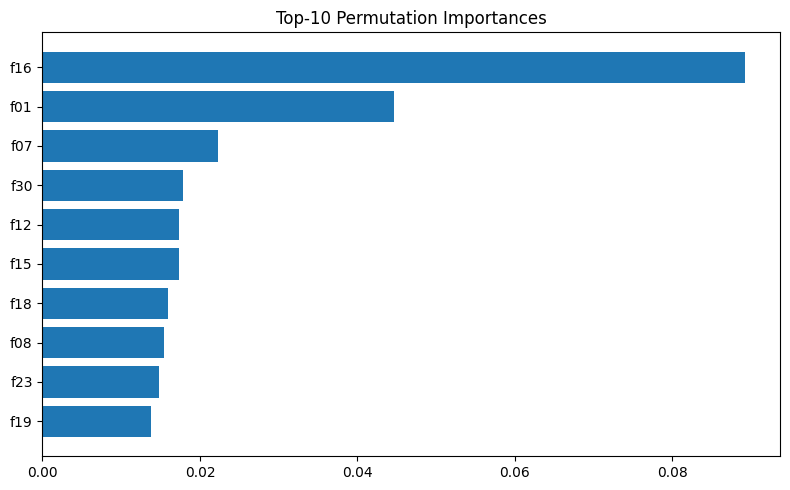

In [10]:
perm_imp = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

indices = np.argsort(perm_imp.importances_mean)[::-1][:10]
feature_names = X.columns[indices]
importances = perm_imp.importances_mean[indices]

plt.figure(figsize=(8, 5))
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), feature_names)
plt.gca().invert_yaxis()
plt.title('Top-10 Permutation Importances')
plt.tight_layout()
plt.savefig('artifacts/figures/permutation_importance.png', bbox_inches='tight')
plt.show()

importance_dict = dict(zip(feature_names, importances))
with open('artifacts/permutation_importance.json', 'w') as f:
    json.dump(importance_dict, f, indent=2)

In [11]:
with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(all_metrics, f, indent=2)

search_summaries = {
    'DecisionTree': {
        'best_params': dt_grid.best_params_,
        'best_cv_score': float(dt_grid.best_score_)
    },
    'RandomForest': {
        'best_params': rf_grid.best_params_,
        'best_cv_score': float(rf_grid.best_score_)
    },
    'GradientBoosting': {
        'best_params': gb_grid.best_params_,
        'best_cv_score': float(gb_grid.best_score_)
    }
}
with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=2)

joblib.dump(best_model, 'artifacts/best_model.joblib')

best_model_meta = {
    'model_name': best_model_name,
    'params': best_model.get_params(),
    'test_metrics': best_metrics
}
with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_model_meta, f, indent=2)